In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [3]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

claremont = pd.read_csv('claremont.csv')

X = claremont[features].to_numpy()
y = claremont['price'].to_numpy()

In [6]:
scaler = StandardScaler()
scaler.fit(X)

x_scaled = scaler.transform(X)

# Null Model

In [10]:
average_house_price = np.mean(y)

In [11]:
average_house_price

1273417.5111111111

In [12]:
print('${:,.2f}'.format(average_house_price))

$1,273,417.51


In [15]:
print("$" + format(average_house_price, ",.2f"))

$1,273,417.51


# First Feature

In [31]:
features = ['floor_area', 'latitude', 'bedrooms', 'garage', 'bathrooms', 'nearest_stn_dist', 'build_year', 'longitude', 'nearest_sch_rank', 'nearest_sch_dist', 'cbd_dist', 'land_area']

claremont = pd.read_csv('claremont.csv')

X = claremont[features]
y = claremont['price']

scaler = StandardScaler()
scaler.fit(X)

x_scaled = (X - X.mean()) / X.std()

In [33]:
x_scaled.head()

,floor_area,latitude,bedrooms,garage,bathrooms,nearest_stn_dist,build_year,longitude,nearest_sch_rank,nearest_sch_dist,cbd_dist,land_area
0,-0.286135,-0.752412,0.832531,-0.134562,-1.414214,0.070092,-2.042878,-0.759631,-0.622852,-1.901748,0.800261,1.290511
1,0.204742,-0.510420,-0.505465,-0.134562,0.000000,-1.693943,0.623378,-1.688380,2.880689,-1.663718,1.406519,-0.595803
2,2.684300,0.480809,0.832531,1.883871,2.828427,-0.389208,1.111566,0.945421,-0.622852,1.429388,-0.897262,-0.137581
3,0.871831,0.468507,0.832531,-0.134562,0.000000,-0.389208,1.111566,0.945436,-0.622852,1.414955,-0.897262,-0.137581
4,-0.349068,0.994415,0.832531,-0.134562,0.000000,-1.616716,0.811143,0.793814,0.211325,1.054344,-1.018513,-0.277308


In [49]:
scores = []

for predictor in x_scaled.columns:
    X_train = x_scaled.loc[:, [predictor]]

    model = LinearRegression()
    model.fit(X_train, y)

    y_pred = model.predict(X_train)
    mse = np.mean((y_pred - y) ** 2)

    scores.append((mse, predictor))
    
best_mse, best_predictor = sorted(scores)[0]

In [52]:
best_mse, best_predictor

(95814894534.16367, 'floor_area')

In [53]:
np.sqrt(best_mse), best_predictor

(309539.81090348243, 'floor_area')

# Forward Selection

In [80]:
remaining_predictors = list(x_scaled.columns)
n = len(remaining_predictors)

forward_selected_predictors = []
forward_selected_mse = []

for i in range(n):
    scores = []
    # print(forward_selected_predictors)
    
    for predictor in remaining_predictors:
        X_train = x_scaled.loc[:, forward_selected_predictors + [predictor]]

        model = LinearRegression()
        model.fit(X_train, y)

        y_pred = model.predict(X_train)
        mse = np.mean((y_pred - y) ** 2)

        scores.append((mse, predictor))

    best_mse, best_predictor = sorted(scores)[0]
    remaining_predictors.remove(best_predictor)
    
    forward_selected_predictors.append(best_predictor)
    forward_selected_mse.append(best_mse)

In [81]:
forward_selected_predictors

['floor_area',
 'latitude',
 'bedrooms',
 'garage',
 'bathrooms',
 'nearest_stn_dist',
 'build_year',
 'longitude',
 'nearest_sch_rank',
 'nearest_sch_dist',
 'cbd_dist',
 'land_area']

In [82]:
forward_selected_mse

[95814894534.16367,
 74763675042.73782,
 53552475763.74594,
 49973535729.713844,
 46211197096.21529,
 43154341861.47287,
 41997749767.47327,
 40892588193.640274,
 38431971779.52686,
 36236081122.07857,
 35995279344.359985,
 35988017954.89374]

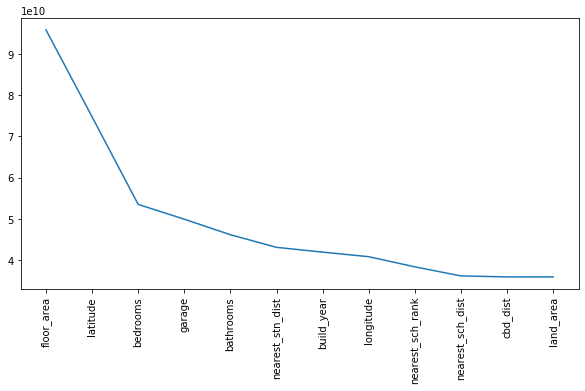

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(forward_selected_mse)

x_pos = np.arange(len(forward_selected_predictors))
plt.xticks(x_pos, forward_selected_predictors, rotation=90);

# Forward Selection via CV

In [88]:
from sklearn.model_selection import cross_val_score

In [91]:
remaining_predictors = list(x_scaled.columns)
n = len(remaining_predictors)

forward_selected_predictors = []
forward_selected_cv = []

for i in range(n):
    scores = []
    # print(forward_selected_predictors)
    
    for predictor in remaining_predictors:
        X_train = x_scaled.loc[:, forward_selected_predictors + [predictor]]

        model = LinearRegression()
        
        neg_mse = cross_val_score(model, X_train, y, cv=5, scoring="neg_mean_squared_error")
        
        average_mse = -np.mean(neg_mse)
        scores.append((average_mse, predictor))

    best_cv, best_predictor = sorted(scores)[0]
    remaining_predictors.remove(best_predictor)
    
    forward_selected_predictors.append(best_predictor)
    forward_selected_cv.append(best_cv)

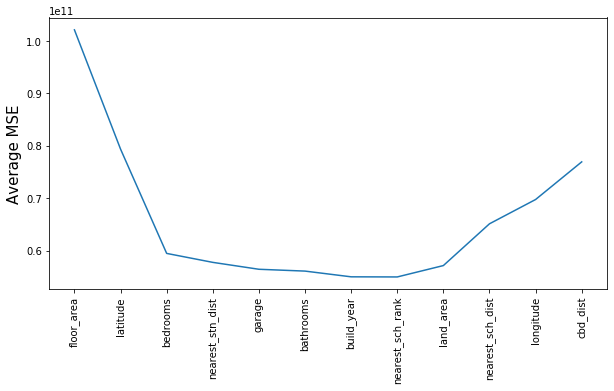

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(forward_selected_cv)

x_pos = np.arange(len(forward_selected_predictors))
plt.xticks(x_pos, forward_selected_predictors, rotation=90)

plt.ylabel("Average MSE", fontsize=15);

In [102]:
np.argmin(forward_selected_cv)

7

In [103]:
forward_selected_predictors[np.argmin(forward_selected_cv)]

'nearest_sch_rank'

In [105]:
import matplotlib
import folium
import branca

In [107]:
price = claremont['price']
colormap = branca.colormap.linear.YlOrRd_09.scale(min(price), max(price))

folium_map = folium.Map(location=(-31.98, 115.78), zoom_start=15)

for i in range(len(claremont)):
    values = claremont.iloc[i, :]
    lat = values["latitude"]
    lon = values["longitude"]
    price = values["price"]

    color = colormap(price)
    folium.CircleMarker([lat, lon], radius=3, color=color,
                        fill=True, fill_opacity=0.7).add_to(folium_map)
    
folium_map.add_child(colormap)
folium_map